In [87]:
!pip install gensim
!pip install sastrawi

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import gensim
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import csv
import requests
from io import StringIO

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
!pip freeze > requirements.txt

## **Loading Dataset**

In [89]:
data = pd.read_csv("ulasan_mybca.csv")

In [90]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.DataFrame(data)

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

In [91]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,649fa411-8781-4101-9152-2fddd839ddf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi myBCA sudah sangat membantu dan tampilannya sederhana. Namun, akan lebih nyaman jika ditambahkan fitur Dark Mode. Dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai. Semoga ke depannya myBCA bisa menghadirkan opsi tampilan terang/gelap atau mengikuti tema sistem. Terima kasih BCA!",5,65,2.8.1,2025-09-01 12:35:23,Terima kasih atas saran dan ulasannya. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi BCA mobile demi kemudahan dan kenyamanan Bapak/Ibu.,2025-09-01 12:56:37,2.8.1
1,6e6db7d7-bff1-4ca5-af5e-c080c430ff8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,sebenarnya sudah lengkap fiturnya. tapi aplikasi terasa agak berat UI beda dengan bank Valentino Rossi 46 yang lebih ringan UI nya. untuk Mybca mohon gambar promo/iklan cukup di beranda muka saja waktu login. kalo sudah masuk menu rekening ga perlu dikasih gaambar² lagi.,5,31,2.8.1,2025-09-06 09:17:01,\nTerima kasih atas saran dan ulasan yang Bpk/Ibu berikan. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi myBCA dan silakan dapat menunggu implementasi dari BCA.,2025-09-06 09:45:12,2.8.1
2,7a6e3324-edb4-46bc-8b1b-8e8bdac29aa5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"sebenernya sangat memudahkan 2 rek bsa di akses dlm 1 mbangking, cmn syg terlalu lambat dan lemot gak bsa langsung doble transaksi, hrus kluar dlu bru masuk ulang,,, mngkin bsa diperbaiki agar tdk lambat dan bsa lbh fleksibel",2,0,2.8.1,2025-09-12 19:01:02,Mohon maaf atas ketidaknyamanannya. Saran dan ulasan Bapak/Ibu akan menjadi bahan evaluasi bagi kami ke depannya untuk pengembangan aplikasi yang lebih baik.,2025-09-13 01:58:11,2.8.1
3,dca44ee4-de57-4140-95d5-4f716db57dff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Transfer gagal tapi saldo kepotong, padahal udah jelas"" ada keterangannya transfer gagal knp sih ga inisiatif saldonya langsung di kembalikan?? Knp harus konfirmasi dululah, pengaduanlah, proses trus nunggu dll baru itu saldo di kembalikan. Kalo emang terjadi kesalahan & udah jelas"" salah tolonglah langsung di kembalikan aja jgn bikin kecewa nasabah. Atau ngga kali"" kalo Lg ada gangguan/kesalahan jgn yg biasa yg selalu merugikan nasabah, Kali"" beda gitu yg luar biasa,menguntungkan nasabah gitu😂",2,3,2.8.1,2025-09-11 21:15:20,Mhn maaf atas ketidaknyamanan Bapak/Ibu. Sebelumnya benar terdapat kendala namun saat ini sdh berangsur normal. Jika kendala transaksi yg dialami tlh memotong saldo maka kami sarankan utk pengecekan lebih lanjut dpt menghubungi layanan Halo BCA di 1500888. Sebagai informasi utk bebas biaya pulsa dpt download aplikasi haloBCA di App Store/Play Store,2025-09-12 01:40:12,2.8.1
4,985f5877-bac4-43ff-9170-cd1c2f1ddd61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tolong ya klo emang lagi gangguan itu aplikasi jangan smpai bisa di buka dong, supaya pengguna tau klo sedang ada gangguan. Abis tf beda bank, saldo udh kepotong, mutasi juga udh berhasil. tp rekening penerima ga masuk. di telpon halo bca, bilang sedang ada gangguan sistem. JIKA GANGGUAN ITU APLIKASINYA KUNCI DULU, KLO KAYAK GINI APLIKASI BISA DI BUKA TERUS BUAT TF SEDANGKAN AKU GA TAU LAGI TROUBLE APA GA. RASANYA KAYAK NGEJEBAK AJA.",1,130,2.8.1,2025-09-07 19:17:07,"Mohon maaf atas ketidaknyamanannya, ulasan Bapak/Ibu menjadi bahan evaluasi kami guna meningkatkan layanan di masa mend

In [92]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25725 entries, 0 to 25724
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              25725 non-null  object
 1   userName              25725 non-null  object
 2   userImage             25725 non-null  object
 3   content               25725 non-null  object
 4   score                 25725 non-null  int64 
 5   thumbsUpCount         25725 non-null  int64 
 6   reviewCreatedVersion  19826 non-null  object
 7   at                    25725 non-null  object
 8   replyContent          25725 non-null  object
 9   repliedAt             25725 non-null  object
 10  appVersion            19826 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.2+ MB


In [93]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [94]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19826 entries, 0 to 24017
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              19826 non-null  object
 1   userName              19826 non-null  object
 2   userImage             19826 non-null  object
 3   content               19826 non-null  object
 4   score                 19826 non-null  int64 
 5   thumbsUpCount         19826 non-null  int64 
 6   reviewCreatedVersion  19826 non-null  object
 7   at                    19826 non-null  object
 8   replyContent          19826 non-null  object
 9   repliedAt             19826 non-null  object
 10  appVersion            19826 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.8+ MB


In [95]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

## **Preprocessing**

In [96]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [97]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [98]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,649fa411-8781-4101-9152-2fddd839ddf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi myBCA sudah sangat membantu dan tampilannya sederhana. Namun, akan lebih nyaman jika ditambahkan fitur Dark Mode. Dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai. Semoga ke depannya myBCA bisa menghadirkan opsi tampilan terang/gelap atau mengikuti tema sistem. Terima kasih BCA!",5,65,2.8.1,2025-09-01 12:35:23,Terima kasih atas saran dan ulasannya. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi BCA mobile demi kemudahan dan kenyamanan Bapak/Ibu.,2025-09-01 12:56:37,2.8.1
1,6e6db7d7-bff1-4ca5-af5e-c080c430ff8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,sebenarnya sudah lengkap fiturnya. tapi aplikasi terasa agak berat UI beda dengan bank Valentino Rossi 46 yang lebih ringan UI nya. untuk Mybca mohon gambar promo/iklan cukup di beranda muka saja waktu login. kalo sudah masuk menu rekening ga perlu dikasih gaambar² lagi.,5,31,2.8.1,2025-09-06 09:17:01,\nTerima kasih atas saran dan ulasan yang Bpk/Ibu berikan. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi myBCA dan silakan dapat menunggu implementasi dari BCA.,2025-09-06 09:45:12,2.8.1
2,7a6e3324-edb4-46bc-8b1b-8e8bdac29aa5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"sebenernya sangat memudahkan 2 rek bsa di akses dlm 1 mbangking, cmn syg terlalu lambat dan lemot gak bsa langsung doble transaksi, hrus kluar dlu bru masuk ulang,,, mngkin bsa diperbaiki agar tdk lambat dan bsa lbh fleksibel",2,0,2.8.1,2025-09-12 19:01:02,Mohon maaf atas ketidaknyamanannya. Saran dan ulasan Bapak/Ibu akan menjadi bahan evaluasi bagi kami ke depannya untuk pengembangan aplikasi yang lebih baik.,2025-09-13 01:58:11,2.8.1
3,dca44ee4-de57-4140-95d5-4f716db57dff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Transfer gagal tapi saldo kepotong, padahal udah jelas"" ada keterangannya transfer gagal knp sih ga inisiatif saldonya langsung di kembalikan?? Knp harus konfirmasi dululah, pengaduanlah, proses trus nunggu dll baru itu saldo di kembalikan. Kalo emang terjadi kesalahan & udah jelas"" salah tolonglah langsung di kembalikan aja jgn bikin kecewa nasabah. Atau ngga kali"" kalo Lg ada gangguan/kesalahan jgn yg biasa yg selalu merugikan nasabah, Kali"" beda gitu yg luar biasa,menguntungkan nasabah gitu😂",2,3,2.8.1,2025-09-11 21:15:20,Mhn maaf atas ketidaknyamanan Bapak/Ibu. Sebelumnya benar terdapat kendala namun saat ini sdh berangsur normal. Jika kendala transaksi yg dialami tlh memotong saldo maka kami sarankan utk pengecekan lebih lanjut dpt menghubungi layanan Halo BCA di 1500888. Sebagai informasi utk bebas biaya pulsa dpt download aplikasi haloBCA di App Store/Play Store,2025-09-12 01:40:12,2.8.1
4,985f5877-bac4-43ff-9170-cd1c2f1ddd61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tolong ya klo emang lagi gangguan itu aplikasi jangan smpai bisa di buka dong, supaya pengguna tau klo sedang ada gangguan. Abis tf beda bank, saldo udh kepotong, mutasi juga udh berhasil. tp rekening penerima ga masuk. di telpon halo bca, bilang sedang ada gangguan sistem. JIKA GANGGUAN ITU APLIKASINYA KUNCI DULU, KLO KAYAK GINI APLIKASI BISA DI BUKA TERUS BUAT TF SEDANGKAN AKU GA TAU LAGI TROUBLE APA GA. RASANYA KAYAK NGEJEBAK AJA.",1,130,2.8.1,2025-09-07 19:17:07,"Mohon maaf atas ketidaknyamanannya, ulasan Bapak/Ibu menjadi bahan evaluasi kami guna meningkatkan layanan di masa mend

In [99]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [100]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,649fa411-8781-4101-9152-2fddd839ddf2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Aplikasi myBCA sudah sangat membantu dan tampilannya sederhana. Namun, akan lebih nyaman jika ditambahkan fitur Dark Mode. Dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai. Semoga ke depannya myBCA bisa menghadirkan opsi tampilan terang/gelap atau mengikuti tema sistem. Terima kasih BCA!",5,65,2.8.1,2025-09-01 12:35:23,Terima kasih atas saran dan ulasannya. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi BCA mobile demi kemudahan dan kenyamanan Bapak/Ibu.,2025-09-01 12:56:37,2.8.1,Aplikasi myBCA sudah sangat membantu dan tampilannya sederhana Namun akan lebih nyaman jika ditambahkan fitur Dark Mode Dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai Semoga ke depannya myBCA bisa menghadirkan opsi tampilan teranggelap atau mengikuti tema sistem Terima kasih BCA,aplikasi mybca sudah sangat membantu dan tampilannya sederhana namun akan lebih nyaman jika ditambahkan fitur dark mode dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai semoga ke depannya mybca bisa menghadirkan opsi tampilan teranggelap atau mengikuti tema sistem terima kasih bca,aplikasi mybca sudah sangat membantu dan tampilannya sederhana namun akan lebih nyaman jika ditambahkan fitur dark mode dark mode bisa mengurangi ketegangan mata saat digunakan di malam hari dan juga lebih hemat baterai semoga ke depannya mybca bisa menghadirkan opsi tampilan teranggelap atau mengikuti tema sistem terima kasih bca,"[aplikasi, mybca, sudah, sangat, membantu, dan, tampilannya, sederhana, namun, akan, lebih, nyaman, jika, ditambahkan, fitur, dark, mode, dark, mode, bisa, mengurangi, ketegangan, mata, saat, digunakan, di, malam, hari, dan, juga, lebih, hemat, baterai, semoga, ke, depannya, mybca, bisa, menghadirkan, opsi, tampilan, teranggelap, atau, mengikuti, tema, sistem, terima, kasih, bca]","[aplikasi, mybca, membantu, tampilannya, sederhana, nyaman, fitur, dark, mode, dark, mode, mengurangi, ketegangan, mata, malam, hemat, baterai, semoga, depannya, mybca, menghadirkan, opsi, tampilan, teranggelap, mengikuti, tema, sistem, terima, kasih, bca]",aplikasi mybca membantu tampilannya sederhana nyaman fitur dark mode dark mode mengurangi ketegangan mata malam hemat baterai semoga depannya mybca menghadirkan opsi tampilan teranggelap mengikuti tema sistem terima kasih bca
1,6e6db7d7-bff1-4ca5-af5e-c080c430ff8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,sebenarnya sudah lengkap fiturnya. tapi aplikasi terasa agak berat UI beda dengan bank Valentino Rossi 46 yang lebih ringan UI nya. untuk Mybca mohon gambar promo/iklan cukup di beranda muka saja waktu login. kalo sudah masuk menu rekening ga perlu dikasih gaambar² lagi.,5,31,2.8.1,2025-09-06 09:17:01,\nTerima kasih atas saran dan ulasan yang Bpk/Ibu berikan. Hal ini menjadi masukan bagi kami untuk pengembangan aplikasi myBCA dan silakan dapat menunggu implementasi dari BCA.,2025-09-06 09:45:12,2.8.1,sebenarnya sudah lengkap fiturnya tapi aplikasi terasa agak berat UI beda dengan bank Valentino Rossi yang lebih ringan UI nya untuk Mybca mohon gambar promoiklan cukup di beranda muka saja waktu login kalo sudah masuk menu rekening ga perlu dikasih gaambar² lagi,sebenarnya sudah lengkap fiturnya tapi aplikasi terasa agak berat ui beda dengan bank valentino rossi yang lebih ringan ui nya untuk mybca mohon gambar promoiklan cukup di beranda muka saja waktu login kalo sudah masuk menu rekening ga perlu dikasih

## **Labeling**

In [101]:
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [102]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    return score, polarity

In [103]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    10730
negative     9096
Name: count, dtype: int64


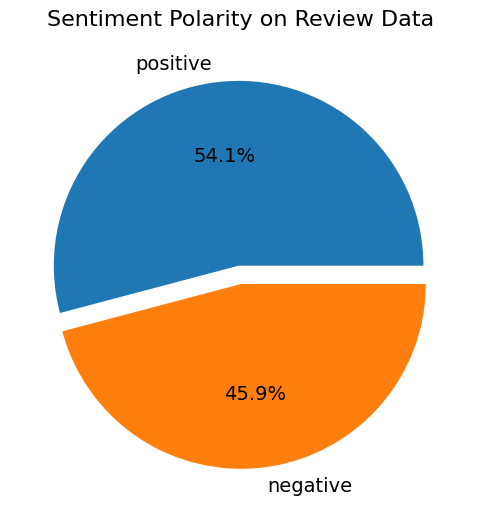

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]

labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [105]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [106]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

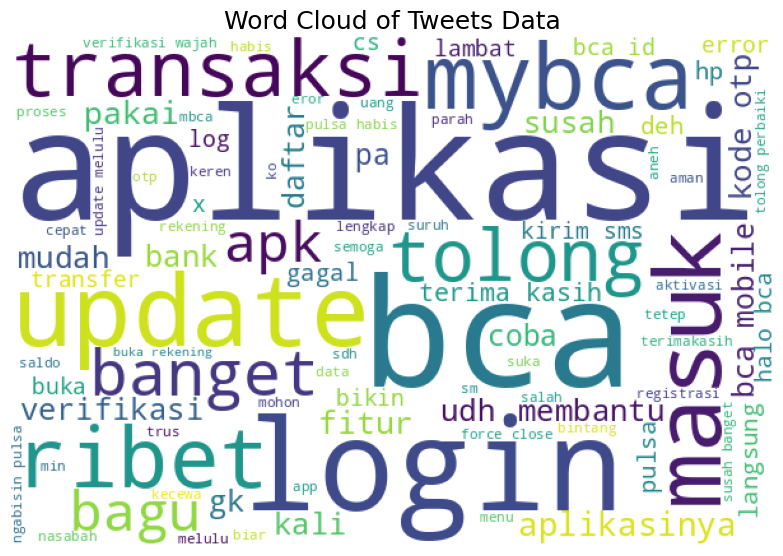

In [107]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'.
for tweet in clean_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

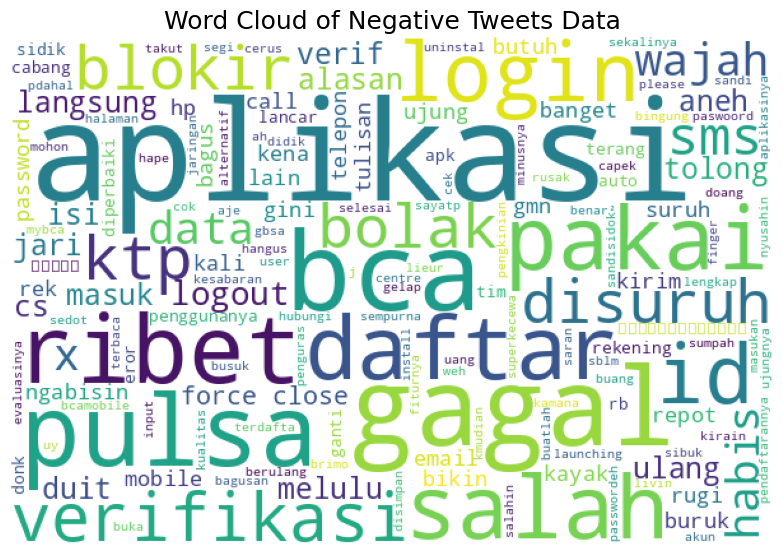

In [108]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'.
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

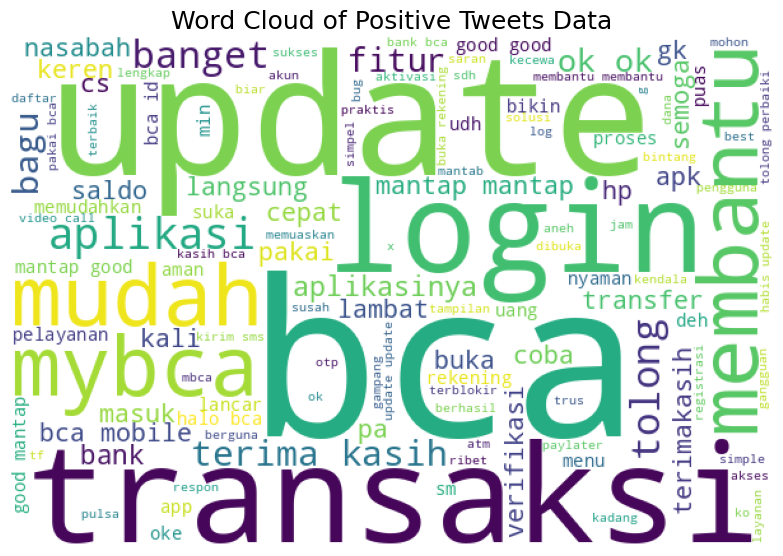

In [109]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif.
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'.
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet.
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu.
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud.
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

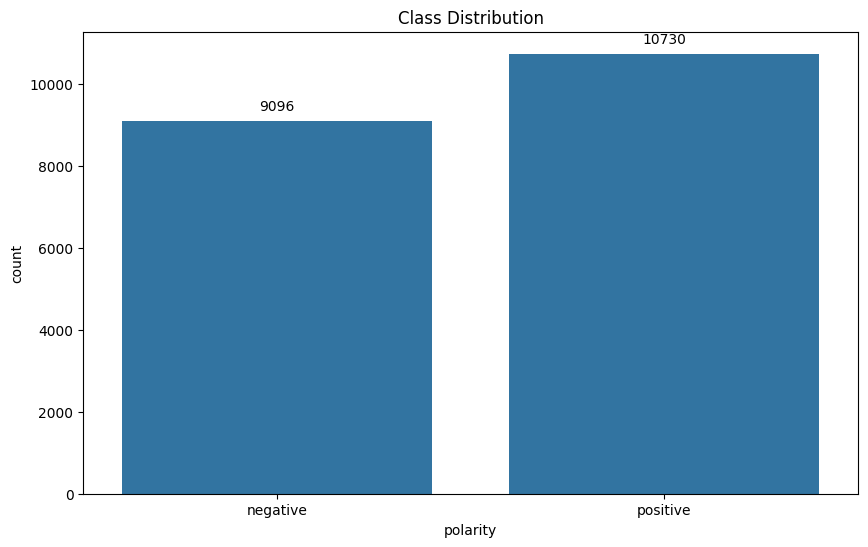

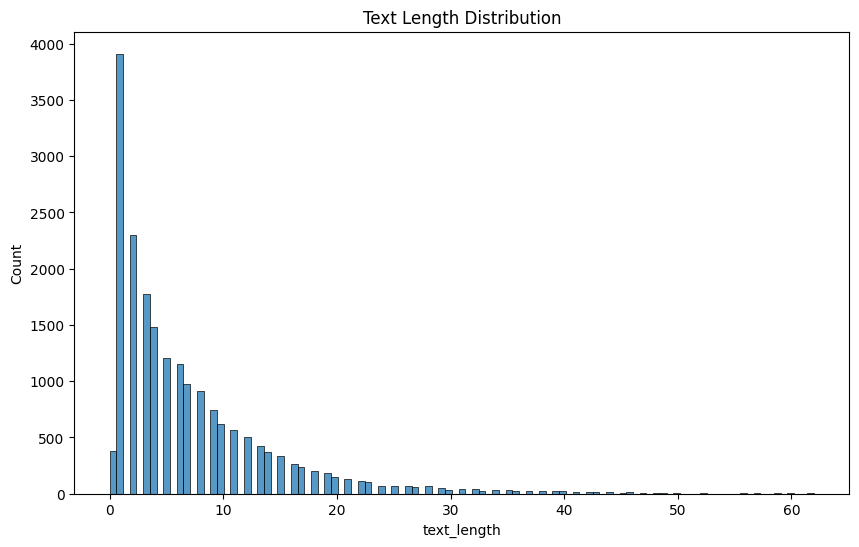

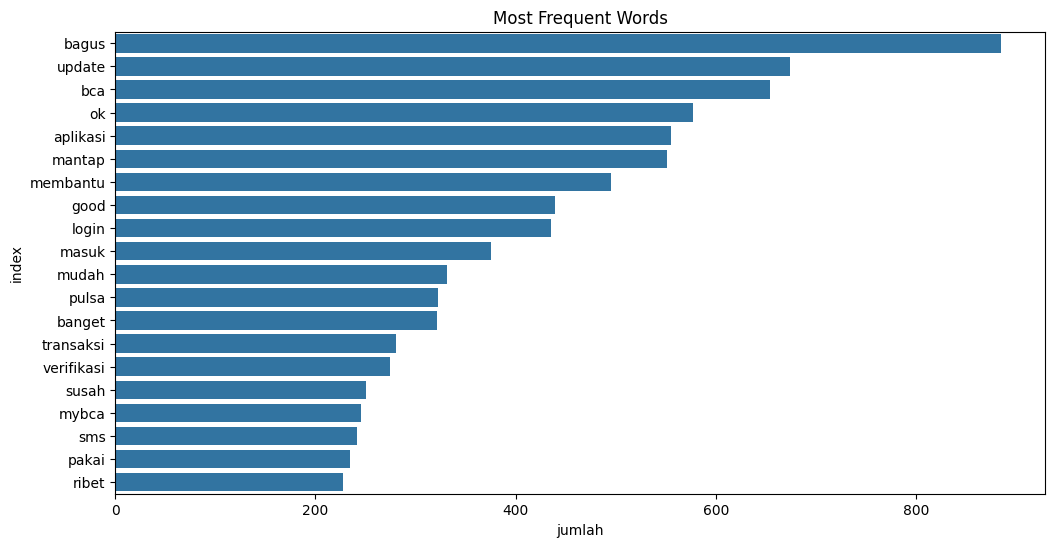

In [110]:
plt.figure(figsize=(10, 6))

# cek kelas distribusi
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

# Visualisasi distribudi text length
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

# Visualisai frekuensi
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

## **Data Splitting**

In [111]:
# Gunakan kolom 'text_akhir' (setelah preprocessing) sebagai input, dan 'polarity' sebagai label
X = clean_df['text_akhir']
y = clean_df['polarity']

print("Jumlah data total:", len(X))
print("Distribusi kelas:\n", y.value_counts())

Jumlah data total: 19826
Distribusi kelas:
 polarity
positive    10730
negative     9096
Name: count, dtype: int64


In [112]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ekstraksi fitur dengan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred_svm = svm_model.predict(X_test_tfidf)
print("\n Skema 1: SVM + TF-IDF (80/20)")
print(classification_report(y_test, y_pred_svm))

# Calculate accuracy for SVM + TF-IDF
acc_svm_tfidf = accuracy_score(y_test, y_pred_svm)


 Skema 1: SVM + TF-IDF (80/20)
              precision    recall  f1-score   support

    negative       0.94      0.93      0.94      1820
    positive       0.95      0.95      0.95      2146

    accuracy                           0.95      3966
   macro avg       0.95      0.94      0.94      3966
weighted avg       0.95      0.95      0.95      3966



In [113]:
# Tokenize data untuk Word2Vec
X_tokens = clean_df['text_stopword']

# Train Word2Vec
w2v_model = Word2Vec(sentences=X_tokens, vector_size=100, window=5, min_count=2, workers=4, sg=1)

def vectorize_text(tokens, model, vector_size=100):
    vec = np.zeros(vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count > 0:
        vec /= count
    return vec

# Konversi dataset ke vektor
X_vec = np.array([vectorize_text(tokens, w2v_model) for tokens in X_tokens])

# Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42, stratify=y)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi
y_pred_rf_w2v = rf_model.predict(X_test)
print("\n Skema 2: Random Forest + Word2Vec (80/20)")
print(classification_report(y_test, y_pred_rf_w2v))

# Calculate accuracy for Random Forest + Word2Vec
acc_rf_w2v = accuracy_score(y_test, y_pred_rf_w2v)


 Skema 2: Random Forest + Word2Vec (80/20)
              precision    recall  f1-score   support

    negative       0.79      0.88      0.83      1820
    positive       0.89      0.80      0.84      2146

    accuracy                           0.84      3966
   macro avg       0.84      0.84      0.84      3966
weighted avg       0.84      0.84      0.84      3966



In [114]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TF-IDF
tfidf_vectorizer2 = TfidfVectorizer(max_features=5000)
X_train_tfidf2 = tfidf_vectorizer2.fit_transform(X_train)
X_test_tfidf2 = tfidf_vectorizer2.transform(X_test)

# Model Random Forest
rf_model2 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model2.fit(X_train_tfidf2, y_train)

# Evaluasi
y_pred_rf_tfidf = rf_model2.predict(X_test_tfidf2)
print("\n Skema 3: Random Forest + TF-IDF (70/30)")
print(classification_report(y_test, y_pred_rf_tfidf))

# Calculate accuracy for Random Forest + TF-IDF
acc_rf_tfidf = accuracy_score(y_test, y_pred_rf_tfidf)


 Skema 3: Random Forest + TF-IDF (70/30)
              precision    recall  f1-score   support

    negative       0.85      0.93      0.89      2729
    positive       0.94      0.86      0.90      3219

    accuracy                           0.89      5948
   macro avg       0.89      0.90      0.89      5948
weighted avg       0.90      0.89      0.89      5948



In [115]:
# Membuat DataFrame untuk hasil akurasi dari 3 skema
results_df = pd.DataFrame({
    'Model': [
        'SVM + TF-IDF (80/20)',
        'Random Forest + Word2Vec (80/20)',
        'Random Forest + TF-IDF (70/30)'
    ],
    'Accuracy Test': [
        acc_svm_tfidf,
        acc_rf_w2v,
        acc_rf_tfidf
    ]
})

# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = results_df.sort_values(by='Accuracy Test', ascending=False).reset_index(drop=True)

# Menampilkan DataFrame yang telah diurutkan
print("\n=== Perbandingan Akurasi 3 Skema ===")
print(accuracy_test_sorted)


=== Perbandingan Akurasi 3 Skema ===
                              Model  Accuracy Test
0              SVM + TF-IDF (80/20)       0.945033
1    Random Forest + TF-IDF (70/30)       0.893914
2  Random Forest + Word2Vec (80/20)       0.836107


In [116]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Preprocessing kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Ekstraksi fitur dengan TF-IDF (pakai vectorizer dari SVM training)
X_kalimat_baru = tfidf_vectorizer.transform([kalimat_baru_final])

# Prediksi dengan model SVM
prediksi_sentimen = svm_model.predict(X_kalimat_baru)

if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Masukkan kalimat baru: aplikasinya ringan tapi suka error
Sentimen kalimat baru adalah NEGATIF.
